# Table of Contents
 <p><div class="lev1"><a href="#Plot-individual-heatmaps"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot individual heatmaps</a></div><div class="lev1"><a href="#Plot-the-heatmap-of-the-057/439-CF-ratio"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot the heatmap of the 057/439 CF ratio</a></div><div class="lev1"><a href="#Plot-the-ratio-of-normalized-trans-and-average-cis-maps"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the ratio of normalized trans and average-cis maps</a></div>

In [1]:
import os

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

%matplotlib inline

import cooler
import bioframe

import cooltools
import cooltools.num
import cooltools.num.numutils

In [2]:
# add fall colormap

def listToColormap(colorList, cmapName=None):
    colorList = np.array(colorList)
    if colorList.min() < 0:
        raise ValueError("Colors should be 0 to 1, or 0 to 255")
    if colorList.max() > 1.:
        if colorList.max() > 255:
            raise ValueError("Colors should be 0 to 1 or 0 to 255")
        else:
            colorList = colorList / 255.
    return matplotlib.colors.LinearSegmentedColormap.from_list(cmapName, colorList, 256)

fallList = [
     (255, 255, 255), (255, 255, 204),
     (255, 237, 160), (254, 217, 118),
     (254, 178, 76), (253, 141, 60),
     (252, 78, 42), (227, 26, 28),
     (189, 0, 38), (128, 0, 38), (0, 0, 0)]


def registerList(mylist, name):
    mymap = listToColormap(mylist, name)
    mymapR = listToColormap(mylist[::-1], name + "_r")
    mymapR.set_bad('white',1.)
    mymap.set_bad('white',1.)
    matplotlib.cm.register_cmap(name, mymap)
    matplotlib.cm.register_cmap(name + "_r", mymapR)

registerList(fallList, "fall")

coolwarm = matplotlib.cm.coolwarm
coolwarm.set_bad('white',1.)
matplotlib.cm.register_cmap('coolwarm', coolwarm)

In [3]:
# define and make the folder to store generated images

FIG_FOLDER = '/net/levsha/share/lab/DrosophilaWulab/doc/2017-10-30-jj-figs/'
os.makedirs(FIG_FOLDER, exist_ok=True)

# Plot individual heatmaps

In [4]:
# select which cooler to plot and the genomic range along the x- and y-axis

COOLER_PATH = '/net/levsha/share/lab/DrosophilaWulab/coolers/JJ17_18.wo3kbCisTransHom.10000.cool'
REGION_X = 'chr2R_057:15,000,000-20,000,000'
REGION_Y = 'chr2R_057:15,000,000-20,000,000'

# pick the figure name that will be used to save the figure
FIGURE_NAME = 'test'

In [5]:
clr = cooler.Cooler(COOLER_PATH)
mat = clr.matrix(balance=True).fetch(REGION_Y, REGION_X)

parsed_region_x = bioframe.parse_region_string(REGION_X)
parsed_region_y = bioframe.parse_region_string(REGION_Y)

/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


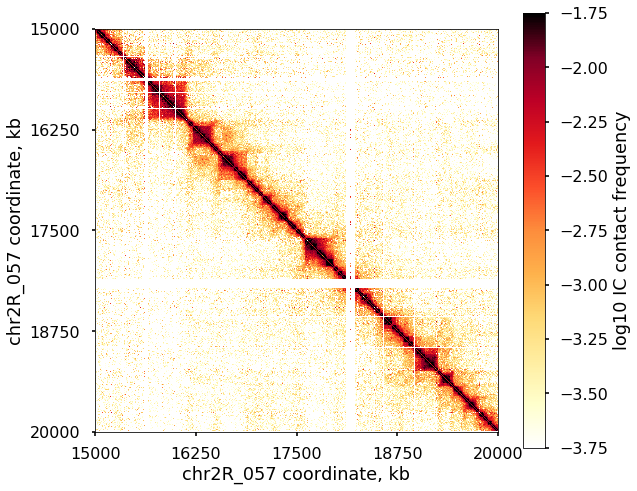

In [18]:
# make a 10x10 inches figure
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.2)


# plot the log10 of the matrix, with the color scale between -3.0 and -1.5
plt.imshow(
    np.log10(mat),
    vmin = -3.75,
    vmax = -1.75,
    cmap='fall'
)

# add a colorbar on a side
plt.colorbar(
    label='log10 IC contact frequency',
    shrink=0.8 # use this argument to adjust the relative size of the colorbar
)

plt.xticks(
    np.linspace(0, mat.shape[1], 5),
    (np.linspace(parsed_region_x[1], parsed_region_x[2], 5) / 1e3).astype(int)
)
plt.xlabel('{} coordinate, kb'.format(parsed_region_x[0]))

plt.yticks(
    np.linspace(0, mat.shape[0], 5),
    (np.linspace(parsed_region_y[1], parsed_region_y[2], 5) / 1e3).astype(int)
)
plt.ylabel('{} coordinate, kb'.format(parsed_region_y[0]))


# save figure as a png and a pdf.
for fmt in ['png', 'pdf']:
    plt.savefig(FIG_FOLDER+'/{}.{}'.format(FIGURE_NAME, fmt),
                bbox_inches='tight',
                dpi=300)

# Plot the heatmap of the 057/439 CF ratio

In [7]:
COOLER_PATH = '/net/levsha/share/lab/DrosophilaWulab/coolers/JJ17_18.wo3kbCisTransHom.10000.cool'

REGION_REF_X = 'chr2R:15,000,000-20,000,000'
REGION_REF_Y = REGION_REF_X
#REGION_REF_Y = 'chr2R:15,000,000-20,000,000'

REGION_057_X = REGION_REF_X.replace(':','_057:')
REGION_057_Y = REGION_REF_Y.replace(':','_057:')

REGION_439_X = REGION_REF_X.replace(':','_439:')
REGION_439_Y = REGION_REF_Y.replace(':','_439:')


FIGURE_NAME = 'test_439_to_057_ratio'

In [8]:
clr = cooler.Cooler(COOLER_PATH)

mat_057 = clr.matrix(balance=True).fetch(REGION_057_Y, REGION_057_X)
mat_439 = clr.matrix(balance=True).fetch(REGION_439_Y, REGION_439_X)

parsed_region_ref_x = bioframe.parse_region(REGION_REF_X)
parsed_region_ref_y = bioframe.parse_region(REGION_REF_Y)


/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


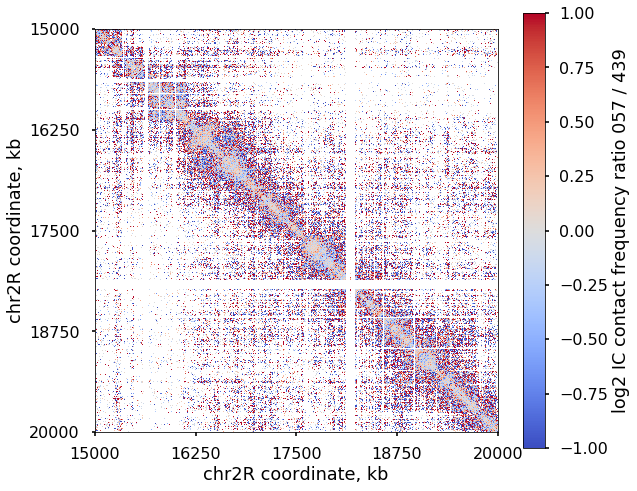

In [9]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.2)

plt.imshow(
    np.log2(mat_439 / mat_057),
    vmin = 1,
    vmax = -1,
    cmap='coolwarm'
)
plt.colorbar(
    label='log2 IC contact frequency ratio 057 / 439',
    shrink=0.8)

plt.xticks(
    np.linspace(0, mat_439.shape[1], 5),
    (np.linspace(parsed_region_ref_x[1], parsed_region_ref_x[2], 5) / 1e3).astype(int)
)
plt.xlabel('{} coordinate, kb'.format(parsed_region_ref_y [0]))

plt.yticks(
    np.linspace(0, mat_439.shape[0], 5),
    (np.linspace(parsed_region_ref_y[1], parsed_region_ref_y[2], 5) / 1e3).astype(int)
)
plt.ylabel('{} coordinate, kb'.format(parsed_region_ref_y[0]))


for fmt in ['png', 'pdf']:
    plt.savefig(FIG_FOLDER+'/{}.{}'.format(FIGURE_NAME, fmt),
                bbox_inches='tight',
                dpi=300)

# Plot the ratio of normalized trans and average-cis maps

In [10]:
COOLER_PATH = '/net/levsha/share/lab/DrosophilaWulab/coolers/JJ17_18.wo3kbCisTransHom.10000.cool'

REGION_CIS_REF = 'chr2R:15,000,000-20,000,000'
REGION_CIS_057 = REGION_CIS_REF.replace(':','_057:')
REGION_CIS_439 = REGION_CIS_REF.replace(':','_439:')

FIGURE_NAME = 'test_trans_to_cis_ratio'

In [11]:
clr = cooler.Cooler(COOLER_PATH)

parsed_region_cis_057 = bioframe.parse_region(REGION_CIS_057)
parsed_region_cis_439 = bioframe.parse_region(REGION_CIS_439)


# Learn the distance-depended normalization from a full chromosome map

mat_cis_057 = clr.matrix(balance=True).fetch(parsed_region_cis_057[0])
mat_cis_439 = clr.matrix(balance=True).fetch(parsed_region_cis_439[0])

mat_cis_avg = (mat_cis_057 + mat_cis_439) / 2

mat_trans = clr.matrix(balance=True).fetch(
    parsed_region_cis_057[0],
    parsed_region_cis_439[0]
)

mat_trans_sym = (mat_trans + mat_trans.T)/2

mask = np.isfinite(clr.bins().fetch(parsed_region_cis_057[0]).weight.values
                  +clr.bins().fetch(parsed_region_cis_439[0]).weight.values)

_, cis_exp_dist_bins, cis_exp_sum, cis_exp_count = (
    cooltools.num.numutils.observed_over_expected(mat_cis_avg,mask))

_, trans_exp_dist_bins, trans_exp_sum, trans_exp_count = (
    cooltools.num.numutils.observed_over_expected(mat_trans_sym,mask))
    
# Apply the distance-dependent normalization to trans and cis maps 
# of the selected region  

mat_cis_reg = (
    ( clr.matrix(balance=True).fetch(REGION_CIS_057) 
    + clr.matrix(balance=True).fetch(REGION_CIS_439) ) / 2 )

mat_trans_reg = clr.matrix(balance=True).fetch(REGION_CIS_057, REGION_CIS_439)

for i in np.arange(mat_cis_reg.shape[0]): 
    dist_bin_idx = np.searchsorted(cis_exp_dist_bins,i,'right')-1
    diag = cooltools.num.numutils.get_diag(mat_cis_reg, i)
    norm_diag = diag / cis_exp_sum[dist_bin_idx] * cis_exp_count[dist_bin_idx]
    cooltools.num.numutils.set_diag(mat_cis_reg, norm_diag, i)
    cooltools.num.numutils.set_diag(mat_cis_reg, norm_diag, -i)
    

for i in np.arange(mat_trans_reg.shape[0]): 
    dist_bin_idx = np.searchsorted(trans_exp_dist_bins,i,'right')-1
    
    diag = cooltools.num.numutils.get_diag(mat_trans_reg, i)
    norm_diag = diag / trans_exp_sum[dist_bin_idx] * trans_exp_count[dist_bin_idx]
    cooltools.num.numutils.set_diag(mat_trans_reg, norm_diag, i)
    
    if i!=0:
        diag = cooltools.num.numutils.get_diag(mat_trans_reg, -i)
        norm_diag = diag / trans_exp_sum[dist_bin_idx] * trans_exp_count[dist_bin_idx]
        cooltools.num.numutils.set_diag(mat_trans_reg, norm_diag, -i)
    

/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/golobor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


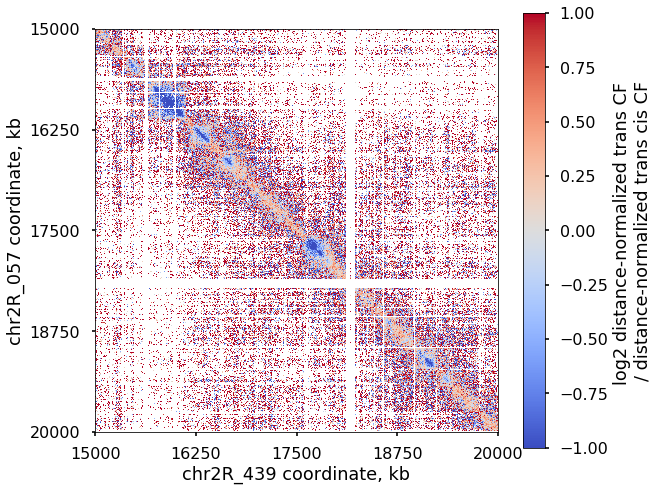

In [12]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.2)

plt.imshow(
    np.log2(mat_trans_reg / mat_cis_reg),
    vmin = 1,
    vmax = -1,
    cmap='coolwarm'
)
plt.colorbar(
    label='log2 distance-normalized trans CF \n/ distance-normalized trans cis CF',
    shrink=0.8)

plt.xticks(
    np.linspace(0, mat_trans_reg.shape[1], 5),
    (np.linspace(parsed_region_cis_439[1], parsed_region_cis_439[2], 5) / 1e3).astype(int)
)
plt.xlabel('{} coordinate, kb'.format(parsed_region_cis_439[0]))

plt.yticks(
    np.linspace(0, mat_trans_reg.shape[0], 5),
    (np.linspace(parsed_region_cis_057[1], parsed_region_cis_057[2], 5) / 1e3).astype(int)
)
plt.ylabel('{} coordinate, kb'.format(parsed_region_cis_057[0]))


for fmt in ['png', 'pdf']:
    plt.savefig(FIG_FOLDER+'/{}.{}'.format(FIGURE_NAME, fmt),
                bbox_inches='tight',
                dpi=300)